In [1]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
base_path = Path("./out_path/TrainedNets")

In [3]:
for p in base_path.glob('./*'):
    print(p, type(p))

out_path\TrainedNets\AutoEncoder_100 <class 'pathlib.WindowsPath'>
out_path\TrainedNets\ClassifierAutoEncoder_100 <class 'pathlib.WindowsPath'>
out_path\TrainedNets\ClassifierDartsEncoder_100 <class 'pathlib.WindowsPath'>
out_path\TrainedNets\Darts_4_nodes <class 'pathlib.WindowsPath'>


In [4]:
model_paths = ["ClassifierAutoEncoder_100",
               "ClassifierDartsEncoder_100"]

model_names = ["CAE (Fixed Arch.)",
               "CAE (Optimized Arch)"]

### Load npy files


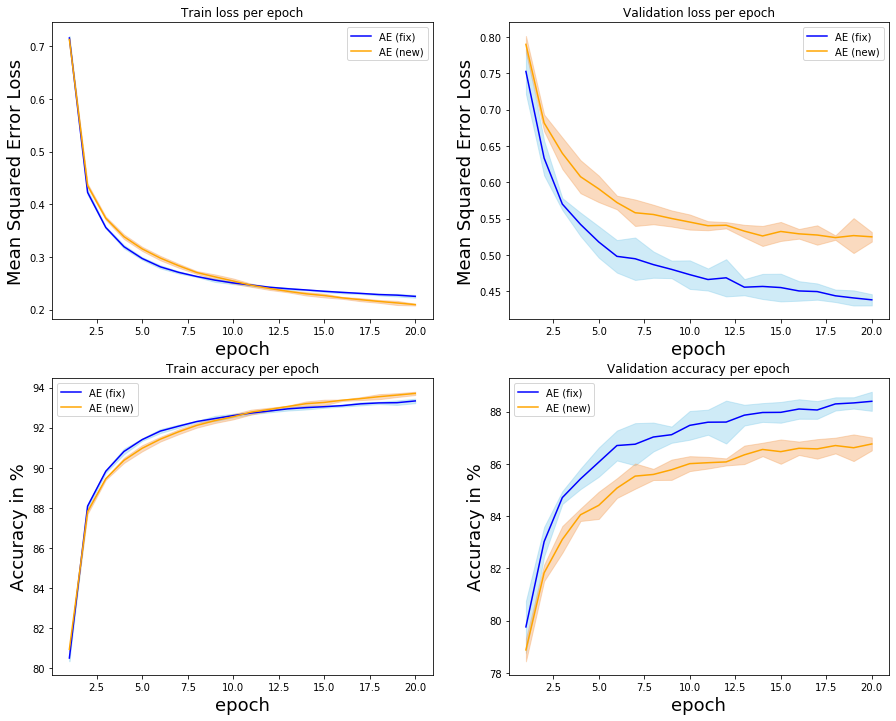

In [6]:
# ax1 -> loss-train, ax2 -> loss-test
# ax3 -> accu-train, ax4 -> accu-test
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=[15, 12])

for model_path, model_name in zip(model_paths, model_names):
    path = base_path / model_path
    
    # Load Loss values
    hist_train = np.load(path / 'hist_train.npy')
    hist_valid = np.load(path / 'hist_valid.npy')
    
    # Calculate Mean and Std
    hist_train_m = hist_train.mean(axis=0)
    hist_valid_m = hist_valid.mean(axis=0)
    hist_train_std = 2 * hist_train.std(axis=0)
    hist_valid_std = 2 * hist_valid.std(axis=0)
      
    # Plot loss plots
    x_range = range(1, len(hist_train_m) + 1)
    label = "AE (fix)" if model_name == "CAE (Fixed Arch.)" else 'AE (new)'
    color = 'blue' if model_name == "CAE (Fixed Arch.)" else 'orange'
    ax1.plot(x_range, hist_train_m, color=color, label=label)
    ax2.plot(x_range, hist_valid_m, color=color, label=label)
    
    color = 'skyblue' if model_name == "CAE (Fixed Arch.)" else 'sandybrown'
    ax1.fill_between(x_range,
                     hist_train_m - hist_train_std,
                     hist_train_m + hist_train_std, color=color,
                     alpha=0.4)

    ax2.fill_between(x_range,
                     hist_valid_m - hist_valid_std,
                     hist_valid_m + hist_valid_std, color=color,
                     alpha=0.4)
    
    #####################################################
    # Load accuracy values    
    hist_train_acc = np.load(path / 'hist_train_acc.npy')
    hist_valid_acc = np.load(path / 'hist_valid_acc.npy')
    
    # Calculate Mean and Std
    hist_train_acc_m = hist_train_acc.mean(axis=0)
    hist_valid_acc_m = hist_valid_acc.mean(axis=0)
    hist_train_acc_std = 2 * hist_train_acc.std(axis=0)
    hist_valid_acc_std = 2 * hist_valid_acc.std(axis=0)
    
    # Plot loss plots
    x_range = range(1, len(hist_train_acc_m) + 1)
    color = 'blue' if model_name == "CAE (Fixed Arch.)" else 'orange'
    label = "AE (fix)" if model_name == "CAE (Fixed Arch.)" else 'AE (new)'
    ax3.plot(x_range, hist_train_acc_m, color=color, label=label)
    ax4.plot(x_range, hist_valid_acc_m, color=color, label=label)
    
    color = 'skyblue' if model_name == "CAE (Fixed Arch.)" else 'sandybrown'
    ax3.fill_between(x_range,
                     hist_train_acc_m - hist_train_acc_std,
                     hist_train_acc_m + hist_train_acc_std, color=color,
                     alpha=0.4)

    ax4.fill_between(x_range,
                     hist_valid_acc_m - hist_valid_acc_std,
                     hist_valid_acc_m + hist_valid_acc_std, color=color,
                     alpha=0.4)

ax1.set_title('Train loss per epoch')
ax2.set_title('Validation loss per epoch')
ax3.set_title('Train accuracy per epoch')
ax4.set_title('Validation accuracy per epoch')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("epoch", fontsize=18)
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.legend()
for ax in [ax1, ax2]:
    ax.set_ylabel('Mean Squared Error Loss', fontsize=18)
for ax in [ax3, ax4]:
    ax.set_ylabel('Accuracy in %', fontsize=18)
    
plt.savefig('./out_path/ComparisonAutoEncVsDartsAutoEnc.png')

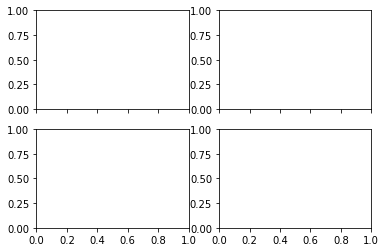

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)